In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\D S\c project\intern_dataset.csv')

In [3]:
data

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
...,...,...,...,...
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,C
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,C
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,C
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,C


In [4]:
data.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA6CFC92C8>,
      dtype=object)

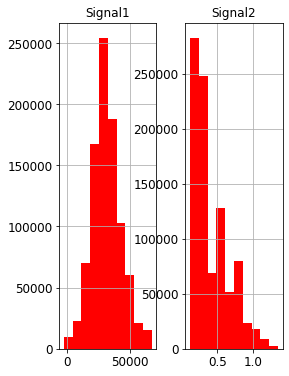

In [7]:
data.hist(figsize=(4, 6),xlabelsize=12, ylabelsize=12, color='r')

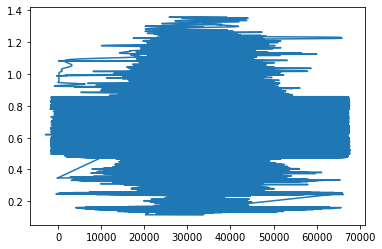

In [8]:
plt.plot(data['Signal1'],data['Signal2']) # x and y cordinate

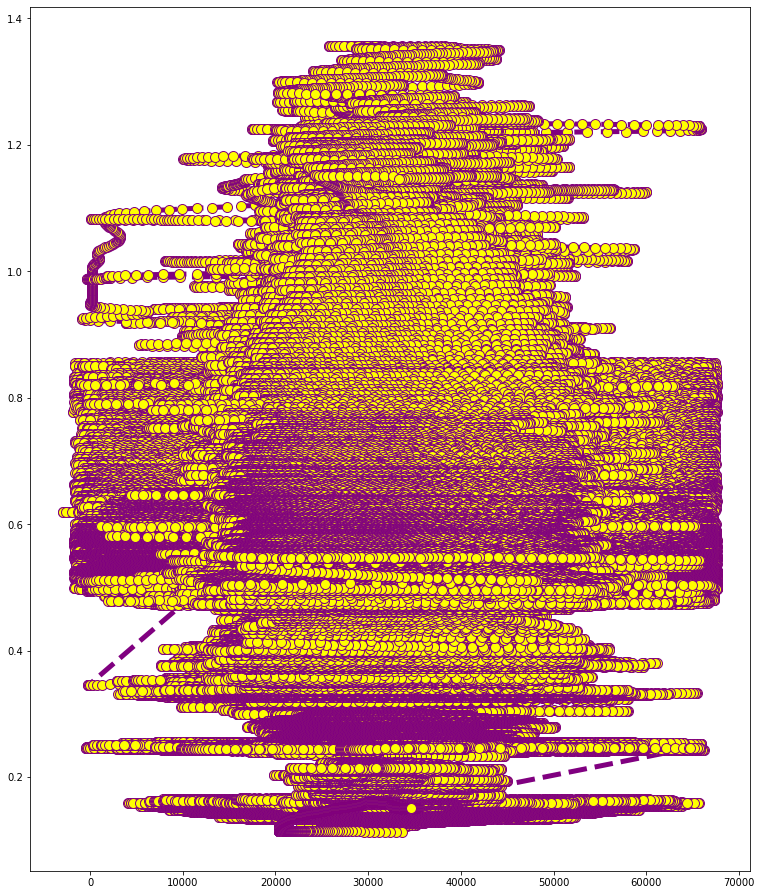

In [9]:
fig7=plt.figure(figsize=(10,12))
ax=fig7.add_axes([0,0,1,1])
ax.plot(data['Signal1'],data['Signal2'],color='purple',linestyle='--',linewidth=5,marker='o',markerfacecolor='yellow',markersize=10) # basic color

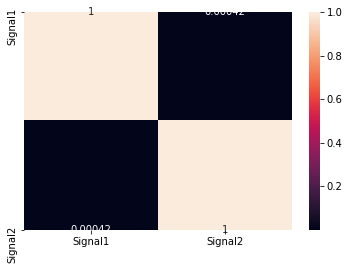

In [10]:
cor=data.corr()
sns.heatmap(cor,annot=True,)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
Time       912000 non-null object
Signal1    912000 non-null float64
Signal2    912000 non-null float64
Label      912000 non-null object
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [12]:
data.columns

Index(['Time', 'Signal1', 'Signal2', 'Label'], dtype='object')

In [13]:
Label = {
    "Label" : {"A":0,"B":1,"C":2}
}
data.replace(Label,inplace=True)

In [14]:
data

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,0
1,2017-08-14 11:37:49.801,32564.903040,0.856705,0
2,2017-08-14 11:37:49.811,31454.043305,0.856683,0
3,2017-08-14 11:37:49.821,30335.387166,0.856659,0
4,2017-08-14 11:37:49.831,29207.142938,0.856634,0
...,...,...,...,...
911995,2020-01-04 10:55:49.186,34673.811155,0.151395,2
911996,2020-01-04 10:55:49.196,34672.951723,0.151385,2
911997,2020-01-04 10:55:49.206,34671.967555,0.151373,2
911998,2020-01-04 10:55:49.216,34670.877944,0.151359,2


In [15]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [18]:
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(x_test)

In [20]:
import sklearn.metrics as metrics

In [21]:
r2  = metrics.r2_score(y_test, y_pred)

In [22]:
print(r2)

0.09789527328028158


In [23]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [24]:
classification.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred = classification.predict(x_test)

In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     63639
           1       0.34      1.00      0.51     62295
           2       0.00      0.00      0.00     56466

    accuracy                           0.34    182400
   macro avg       0.11      0.33      0.17    182400
weighted avg       0.12      0.34      0.17    182400



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.34143092105263156

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9417324561403508

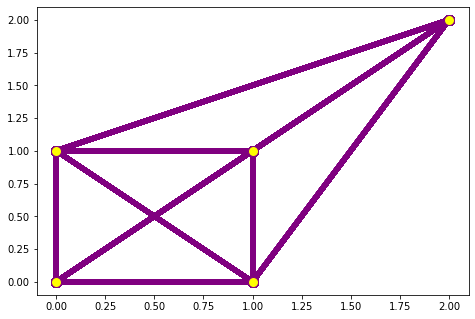

In [34]:
fig8=plt.figure(figsize=(6,4))
ax=fig8.add_axes([0,0,1,1])
ax.plot(y_test, y_pred,color='purple',linestyle='--',linewidth=5,marker='o',markerfacecolor='yellow',markersize=10)